# Initial Exploration of MIMIC-IV and MIMIC-III Databases - WIP

In [27]:
from creds import creds
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
# grab database credentials
host = creds.host
port = creds.port
uname = creds.username
pwd = creds.password

## MIMIC-IV - basics

In [3]:
# establish connection

dbname = 'mimiciv'

conn_iv = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}"
                           .format(host, port, dbname, uname, pwd))

Total number of patients in the MIMIC-IV dataset

In [4]:
sql = 'select count (distinct subject_id) from mimic_core.patients;'
pd.read_sql_query(sql, conn_iv)

,count
0,382278


In [5]:
pd.read_sql_query('select * from mimic_core.patients limit 0',conn_iv)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod


In [6]:
pd.read_sql_query('select * from mimic_core.admissions limit 0',conn_iv)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag


Demographics data from mimic_core schema:

In [7]:

sql = 'select gender, count(distinct subject_id) from mimic_core.patients group by gender;'
gender_distribution = pd.read_sql_query(sql, conn_iv)
gender_distribution

,gender,count
0,F,199707
1,M,182571


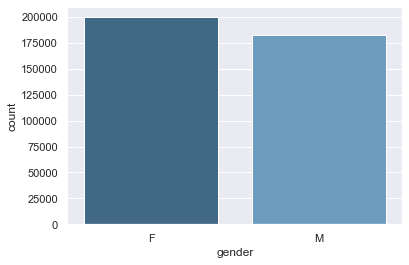

In [46]:
sns.barplot(y='count', x='gender', data=gender_distribution, palette="Blues_d", order=gender_distribution.sort_values('count', ascending=False).gender)
#plt.xticks(rotation=90)
plt.show()

In [31]:
sql = 'select ethnicity, count(distinct subject_id) from mimic_core.admissions group by ethnicity;'
ethnicity_distribution = pd.read_sql_query(sql, conn_iv)
ethnicity_distribution



,ethnicity,count
0,AMERICAN INDIAN/ALASKA NATIVE,992
1,ASIAN,16643
2,BLACK/AFRICAN AMERICAN,31666
3,HISPANIC/LATINO,13758
4,OTHER,18112
5,UNABLE TO OBTAIN,3377
6,UNKNOWN,17370
7,WHITE,161450


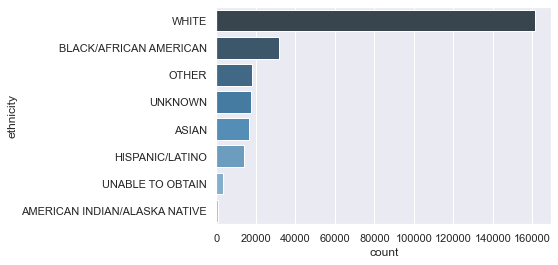

In [45]:
sns.set(style="darkgrid")

sns.barplot(y='ethnicity', x='count', data=ethnicity_distribution, palette="Blues_d", order=ethnicity_distribution.sort_values('count', ascending=False).ethnicity)
#plt.xticks(rotation=90)
plt.show()


Both ethnicity and race are combined under the ethnicity variable. See [https://github.com/MIT-LCP/mimic-code/issues/1236](https://github.com/MIT-LCP/mimic-code/issues/1236) for ongoing discussion on this.

In [15]:
all_patients = pd.read_sql_query('select * from mimic_core.patients', conn_iv)


In [16]:
all_patients.describe()['anchor_age']

count    382278.000000
mean         40.931804
std          26.114457
min           0.000000
25%          22.000000
50%          41.000000
75%          62.000000
max          91.000000
Name: anchor_age, dtype: float64

In [9]:
# anchor age distribution in 10yr bins:
sql = """
select '<= 10' as Age_Category,count(anchor_age) as Count from mimic_core.patients
        where anchor_age between 0 and 10
     union (
     select '11-20' as Age_Category,count(anchor_age) as Count from mimic_core.patients
        where anchor_age between 11 and 20)
     union (
     select '21-30' as Age_Category,count(anchor_age) as Count from mimic_core.patients
        where anchor_age between 21 and 30)
     union (
     select '31-40' as Age_Category,count(anchor_age) as Count from mimic_core.patients
        where anchor_age between 31 and 40)
     union (
     select '41-50' as Age_Category,count(anchor_age) as Count from mimic_core.patients
        where anchor_age between 41 and 50)
     union (
     select '51-60' as Age_Category,count(anchor_age) as Count from mimic_core.patients
        where anchor_age between 51 and 60)
     union (
     select '61-70' as Age_Category,count(anchor_age) as Count from mimic_core.patients
        where anchor_age between 61 and 70)
     union(
     select '71-80' as Age_Category,count(anchor_age) as Count from mimic_core.patients
        where anchor_age between 71 and 80)
     union(
     select '>= 81' as Age_Category,count(anchor_age) as Count from mimic_core.patients
        where anchor_age >= 81);      

"""
age_distribution = pd.read_sql_query(sql,conn_iv)
age_distribution

,age_category,count
0,>= 81,26805
1,61-70,43118
2,41-50,41892
3,31-40,43336
4,51-60,48838
5,11-20,20954
6,71-80,30883
7,21-30,65580
8,<= 10,60872


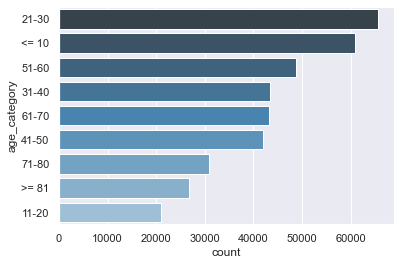

In [47]:

sns.barplot(y='age_category', x='count', data=age_distribution, palette="Blues_d", order=age_distribution.sort_values('count', ascending=False).age_category)
#plt.xticks(rotation=90)
plt.show()

In [21]:
pd.read_sql_query('select distinct language from mimic_core.admissions', conn_iv)


,language
0,?
1,ENGLISH


In [50]:
sql = 'select language, count(distinct subject_id) from mimic_core.admissions group by language;'
pd.read_sql_query(sql, conn_iv)

,language,count
0,?,20673
1,ENGLISH,239132


In [23]:
pd.read_sql_query('select distinct insurance from mimic_core.admissions', conn_iv)


,insurance
0,Other
1,Medicare
2,Medicaid


In [51]:
insurance_distribution = pd.read_sql_query('select insurance, count(distinct subject_id) from mimic_core.admissions group by insurance', conn_iv)
insurance_distribution

,insurance,count
0,Medicaid,26136
1,Medicare,64729
2,Other,180868


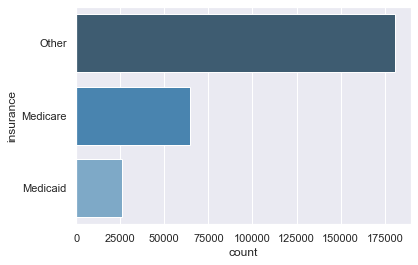

In [53]:
sns.barplot(y='insurance', x='count', data=insurance_distribution, palette="Blues_d", order=insurance_distribution.sort_values('count', ascending=False).insurance)
#plt.xticks(rotation=90)
plt.show()

In [54]:
marital_status_dist = pd.read_sql_query('select marital_status, count(distinct subject_id) from mimic_core.admissions group by marital_status', conn_iv)
marital_status_dist

,marital_status,count
0,DIVORCED,13586
1,MARRIED,87475
2,SINGLE,80922
3,WIDOWED,18968
4,None,63848


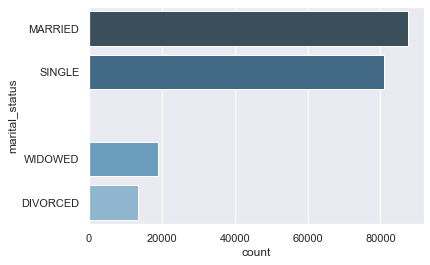

In [58]:

sns.barplot(y='marital_status', x='count', data=marital_status_dist, palette="Blues_d", order=marital_status_dist.sort_values('count', ascending=False).marital_status)
#plt.xticks(rotation=90)
plt.show()

In [59]:
# close connection
conn_iv.close()

## MIMIC-III - basics

In [12]:
# establish connection

dbname = 'mimiciii'

conn_iii = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}"
                            .format(host, port, dbname, uname, pwd))

Total number of patients in the MIMIC-III dataset

In [13]:
sql = "SELECT count(*) from mimiciii.patients"
pd.read_sql_query(sql, conn_iii)

,count
0,46520


In [14]:
# close connection
conn_iii.close()